In [30]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract

CWD_PATH = os.getcwd()
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))

In [31]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 120, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),dtype=np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),dtype=np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5, 5), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def tophat(image):
    kernel = np.ones((5, 5), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_TOPHAT, rectKernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 
def plot_figure(imgs):
    plt.figure(figsize=(15,12))
    i = 0
    for img in imgs:
      plt.subplot(6,5,i+1)
      plt.subplots_adjust(hspace = 0.3)
      plt.imshow(img)
      #plt.title("{} fl {}, nl {}, el {}".format(file_name,fl,nl,el),color=color)
      plt.axis('off')
      i+=1
    _ = plt.suptitle("Testing")    

“

; ” ae
Wj J A
a a CH

We

 



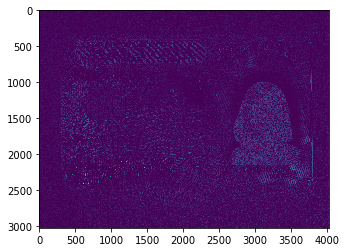

In [32]:
img_file = os.path.join(TEST_IMAGE_PATH,'04.jpg')
image = cv2.imread(img_file)
#image = cv2.blur(image,(5,5))
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
tophat = tophat(gray)


#imgs = [gray,thresh,opening, canny]
#plt.imshow(gray)
#plt.imshow(thresh)
#plt.imshow(opening)
#plt.imshow(canny)
#plt.show()
plt.imshow(tophat)
text = pytesseract.image_to_string(tophat,lang = 'eng+msa')

print(text)
